In [2]:
import drawSvg as draw

class Body:
    def __init__(self,mass,x,y,vx,vy,pixel_radius,r,g,b):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.radius = pixel_radius
        self.color = '#%02x%02x%02x' % (r,g,b)
        
    def update_velocity(self,ax,ay,timestep):
        self.vx = ax * timestep + self.vx
        self.vy = ay * timestep + self.vy
        
    def update_position(self,timestep):
        self.x = self.x + self.vx * timestep
        self.y = self.y + self.vy * timestep
        
    def draw(self,pixels_per_meter):
        self.pixel_x = self.x * pixels_per_meter
        self.pixel_y = self.y * pixels_per_meter
        D.append(draw.Circle(self.pixel_x, self.pixel_y, self.radius, fill = self.color))

In [4]:
import math

class System:
    def __init__(self,body_list):
        self.body_list = body_list
        
    def compute_acceleration(self,n):
        ax = 0
        ay = 0
        G = 6.67384e-11
        for i in range(len(self.body_list)):
            if i != n:
                dx = self.body_list[i].x - self.body_list[n].x
                dy = self.body_list[i].y - self.body_list[n].y
                distance = math.sqrt(dx**2 + dy**2)
                a = (G*self.body_list[i].mass) / distance**2
                ax = ax + a * dx/distance
                ay = ay + a * dy/distance
        return (ax,ay)
    
    def draw(self,pixels_per_meter):
        for k in range(len(self.body_list)):
            self.body_list[k].draw(pixels_per_meter)
            
    def update(self,timestep):
        for m in range(len(self.body_list)):
            acceleration = self.compute_acceleration(m)
            self.body_list[m].update_velocity(acceleration[0],acceleration[1],timestep)
            self.body_list[m].update_position(timestep)
    

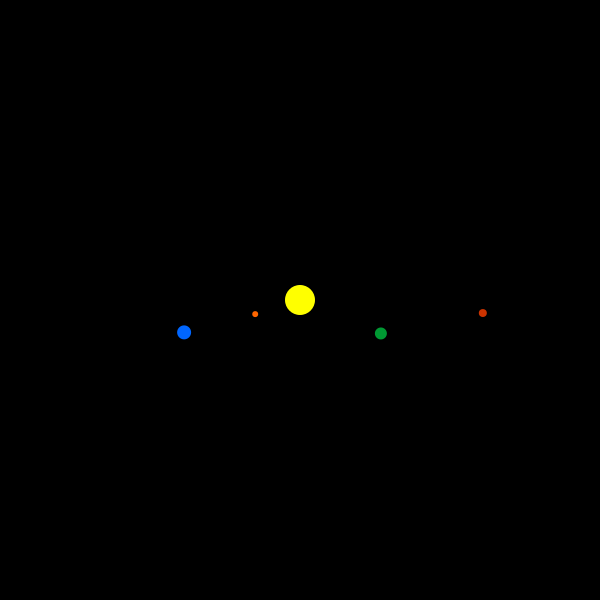

In [ ]:
import drawSvg as draw

AU = 1.49598e11 # number of meters per astronomical unit
EM = 5.9736e24  # mass of the Earth in kilograms

TIME_SCALE = 3.0e6              # how many real seconds for each second of simulation
PIXELS_PER_METER = 120. / AU    # distance scale for the simulation

FRAME_RATE = 30
TIMESTEP = 1.0 / FRAME_RATE     # time between drawing each frame

# Solar system data comes from
#   http://hyperphysics.phy-astr.gsu.edu/hbase/solar/soldata2.html
sun     = Body(1.98892e30, 0, 0, 0, 0, 15, 255, 255, 0)
mercury = Body(.06 * EM, -.3871 * AU, 0, 0, 47890, 3, 255, 102, 0)
venus   = Body(.82 * EM, -.7233 * AU, 0, 0, 35040, 6, 0, 153, 51)
earth   = Body(1.0 * EM, -1.0 * AU, 0, 0, 29790, 7, 0, 102, 255)
mars    = Body(.11 * EM, -1.524 * AU, 0, 0, 24140, 4, 204, 51, 0)
    
solar_system = System([sun, mercury, venus, earth, mars])

def draw_frame():
    solar_system.draw(PIXELS_PER_METER)
    solar_system.update(TIMESTEP * TIME_SCALE)
    return( D )

with draw.animate_jupyter(draw_frame, delay=0.05) as anim:
   while( True ):
        D = draw.Drawing(600, 600, origin='center') # clear canvas
        D.append( draw.Rectangle(-300,-300,600,600,fill='black')) # black background
        anim.draw_frame()